**Competing in different settings**

In this project we consider 2 firms who compete in the same duopolistic market. We will look at three possible competition forms, which are characterized by

**Cournot**

- Firms compete in quantities, and decide upon these independently and simultaneously 

- Firms profit maximize given the other's choice of quantity

- Both firms have market power, thus one's decision of output affects the price of the other's goods

**Bertrand**

- Firms compete in prices, and decide upon these simultaneously and as if they were in a perfect competition setting

- We assume that consumers seek the lowest price 



**Stackelberg**

- Firms compete in quantities, and decide upon these sequentially. 

- One firm is assumed to be the leader, and the other is the follower. 

In the following we will analyse a sitaution with linear demand with $a=101$, $b=0.1$ and cost equal to 1 for all firms under all three situations.


In [814]:
#Import packages
from scipy import optimize,arange
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import random
import sympy as sm
from math import *
%matplotlib inline
from IPython.display import Markdown, display
import pandas as pd

**Bertand**

First we wanna solve the case of Bertand competetion, i.e a sitatuion, where the firms compete in prices. Here we consider two companies who are selling differentiated products. The quantity each firm produces is dependent on the on it's own price $p_1$ and the competitor's price $p_2$.
$$x_1 = a - p_1 +bp_2$$
$$x_2 = a - p_2 + bp_1$$
The individual companies profits can be defined as: 
$$\pi_1 = (p_1 - c_1)(a - p_1 +bp_2)$$
$$\pi_2 = (p_2 - c_2)(a - p_2 + bp_1).$$
For the following parts we assume that both companies have identical marginal costs and thus $$c_1 = c_2 = c.$$

In [815]:
#Variables
a = sm.symbols('a')
p1 = sm.symbols('p1') 
p2 = sm.symbols('p2') 
c = sm.symbols('c') 
b = sm.symbols('b') 
alpha=sm.symbols('alpha')

#Frist we define the profit funtioncs for the two firms:  
pi1 = (p1-c)*(a-p1+b*p2)
pi2 = (p2-c)*(a-p2+b*p1)

In order to get the equilibrium price we first have to determine the first order conditions (FOC) by maximizing the profit functions of the individual firms with repsect to the prices they offer. 
$$\frac{\partial\pi_1}{\partial p_1}= a - 2p_1 + bp_2 + c=0$$
$$\frac{\partial\pi_2}{\partial p_2}= a - 2p_2 + bp_1 + c=0$$

By solving the first order conditions for the respective prices we arrive at the reaction functions. 
$$p_1^{*} = \frac{a+ b*p_2 + c}{2}$$
$$p_2^{*} = \frac{a+ b*p_1 + c}{2}$$

By setting them equal, since it is the best repsonse for both firms to set their price equal to the competitior's price, we arrive at our equilibrium price: 
$$p^{*} = \frac{-(a+c)}{b-2}$$

In [816]:
#The first order conditions are then: 
FOC1 = sm.diff(pi1, p1)
FOC2 = sm.diff(pi2, p2)


#Reactionsfuncions 
RF1 = sm.solve(FOC1, p1)[0]
RF2 = sm.solve(FOC2, p2)[0]

#Equilibrium price
RF12 = sm.solve(FOC2,p1)[0] 
EP1 = sm.solve(RF1-RF12,p2)[0]
print(EP1) #Equilibrium price both companies will charge 
RF21 = sm.solve(FOC1,p2)[0] 
EP2 = sm.solve(RF2-RF21,p1)[0]

-(a + c)/(b - 2)


Using the lambdify feature from the sympy package we can now make a function to solve the bertrand competition for chosen values. In this case we set $a$ equal to 101, $b$ equal to 0.1 and $c$ equal to 1 (the numbers were decided on arbitrarily).


In [873]:
#make it a function to solve it 
bertrand = sm.lambdify((a,b,c), EP1)
price1=bertrand(101,0.1,1)
quantity1 = 101 - 0.9*bertrand(101,0.1,1)
profit1 = (bertrand(101,0.1,1)-1)*(101 - 0.9*bertrand(101,0.1,1))

#Defining a way to print the solution in a fancy way
def fancy(string):
    """ A function that prints strings in a fancy way
    args:
    string : a string
    
    returns : a string i an fancy way"""
    display(Markdown(string))


fancy(f'The equilibrium price is $p$ = {price1:.1f}, the equilibrium quantity is $x$ = {quantity1:.1f} and the profits for both firms are $π$ = {profit1:.1f}') 

The equilibrium price is $p$ = 53.7, the equilibrium quantity is $x$ = 52.7 and the profits for both firms are $π$ = 2775.6

**Stackelberg**

We now turn to the Stackelberg, i.e a sequantiacal competion in quantities, thus one company is the leader and the other is a follower. 

In [874]:
#values 
p = sm.symbols('p')
x1 = sm.symbols('x1')
x2 = sm.symbols('x2')

#Giving values to our parameters
a = 101
c = 1
b = 0.1

Each firm chooses a quantitiy $x_{1}, x_{2}\geq0$ where the cost of production is $c_{1}=c_{2}$. Each firm set the price $p = a-b\left(x_{1}+x_{2}\right)$. The profit function for firm $i$ is then written as $\pi_{i}\left(x_{i}\right)=p\left(x_{i}\right)-c_{i}x_{i}$ Assume firm 1 is the leader and 2 is the follower. The game is solved by backward induction.
  
We will first define the inverse demand function $p$:

In [875]:
#Defining price
p = a - b*(x1+x2)  

Then, we set up the profit function for firm 1 and firm 2:

In [876]:
#Profit function of firm 1
profit_1 = p*x1 - c*x1
profit_2 = p*x2 - c*x2

We will say that firm 1 decides first on its output. Firm 2 observes the decision of firm 1 and decides how to reacht. We can solve the problem backwards and find optimal output of firm 2 for each possible output level of firm 1.  
It means that we maximize the profit of firm 2 by differentiating it by $x_2$.

In [825]:
#Differentiating the profit of firm 2 by q2

diff_profit_2 = sm.diff(profit_2, x2)
diff_profit_2

-0.1*x1 - 0.2*x2 + 100

In [826]:
#Finding optimal q2 by isolating q2 from the differentiation
opt_2 = sm.solve(diff_profit_2, x2)
opt_2[0]

500.0 - 0.5*x1

Then, we can substitute $q_2$ into the profit function of firm 1. Thanks to that, we have a single variable function.

In [827]:
#Substituting q2 into the profit function of firm 1
profit_1_subs = profit_1.subs(x2,opt_2[0])
profit_1_subs

x1*(51.0 - 0.05*x1) - x1

Once again, we need to differentiate the profit of firm 1 by $q_1$ to find the optimal value of $q_1$.

In [828]:
#Differentiating the profit of firm 1 by q1

diff_profit_1 = sm.diff(profit_1_subs, x1)
diff_profit_1

50.0 - 0.1*x1

In [829]:
#Finding the optimal value of q1

opt_1 = sm.solve(diff_profit_1, x1)
opt_1[0]

500.000000000000

Now, we can find the optimal value of $q_2$.

In [830]:
opt_2_subs = opt_2[0].subs(x1,opt_1[0])
opt_2_subs

250.000000000000

We can also find the equilibrium market price, profit of firm 1 and profit of firm 2:

In [833]:
#Finding equilibrium market price
p = a - b*(opt_1[0] + opt_2_subs)

#Finding profit of firm 1
profit_1 = p*opt_1[0] - c*opt_1[0]

#Finding profit of firm 2
profit_2 = p*opt_2_subs - c*opt_2_subs


fancy(f'The equilibrium price is $p$ = {p:.0f}, and the profits for both firms are $π_1$ = {profit_1:.0f} and $π_2$ = {profit_2:.0f}')

The equilibrium price is $p$ = 26, and the profits for both firms are $π_1$ = 12500 and $π_2$ = 6250

We now want to make a figure that show how the beste responses relate.

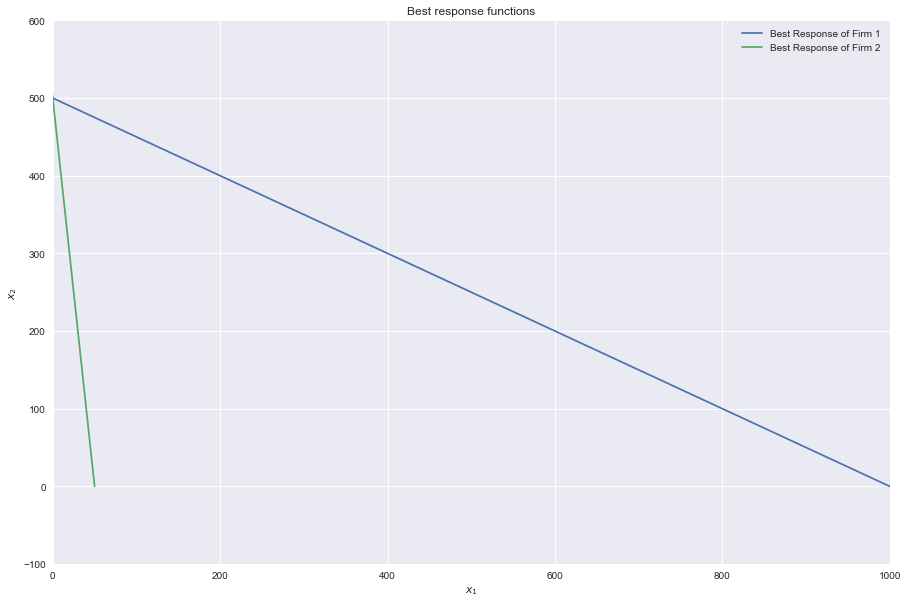

In [893]:
#Defining the x-axis
qu_1 = np.linspace(0, 1000, 1000)

#Defining the lambda functions for our best responses functions
BR2 = lambda qu_1 : 500 - qu_1/2
BR1 = lambda qu_1 : 50 - qu_1/10

#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(qu_1, BR2(qu_1), label = "Best Response of Firm 1")
plt.plot(BR1(qu_1),qu_1 , label = "Best Response of Firm 2")
plt.grid(True)         
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Best response functions')
plt.legend()

#To include a quantity of 0 for 1 firm, we set the axis like this
plt.xlim(0,1000) # sets the x-axis
plt.ylim(-100,600) # Sets the y-axis


plt.show()

**ADRIAN - this should be changed. This tells that when firm chooses a quantity of 500 in the first stage, firm 2 will choose a quantity half the size of firm 1 in second stage. In a case where firm 1 chooses to produce 1000 units, firm 2 will then produce 0.** 

**Cournot**

For the Cournot case we are gonna set up some functions to solve the model in order to make an extention with n firms later on. For the solution with we have found inspiration in the following article: http://janboone.github.io/competition_policy_and_regulation/Collusion_Cournot/Collusion_Cournot.html

Consider the linear invese demand curve $p\left(x_{1},x_{2}\right)=a-x_{1}-bx_{j}$ where $b\in\left(0,1\right)$ is the elasticity of substitution between the goods, i.e. indicates that the goods are heterogenous for $0<b<1$. 

We write the inverse demand:

In [888]:
#Variables
a = sm.symbols('a')
x1 = sm.symbols('x1') 
x2 = sm.symbols('x2') 
c1 = sm.symbols('c1')
c2 = sm. symbols('c2')
c = sm.symbols('c')
b = sm.symbols('b') 
pi = sm.symbols('pi') 

In [889]:
def price(x1,x2,a,b):
    """A function that computes price 
    args:
    x1 : quantity for firm 1 
    x2 : quantity for firm 2 
    a :total demand 
    b : elasticity of substitution
    
    returns a float
    """
    return a-b*(x1+x2)


Firms have constant marginal costs, where total costs are given by $c\left(x_{1,2}\right)=cx_{1,2}$

In [890]:
def cost(x,c):
    """A function that computes total cost
    args:
    c : cost for firm i
    x : quantity for firm i
    
    returns a float  
    """
    cost = c*x
    return cost

Firms maximize profits given the choice of the other firm such that $$\pi\left(x_{1},x_{2}\right)=p_{1}\left(x_{1},x_{2}\right)x_{1}-c\left(x_{1}\right)$$

In [883]:
def profit(x1,x2,c1,a,b):
    """A function that computes profit for firm 1
    args:
    x1 : quantity for firm 1 
    x2 : quantity for firm 2 
    c1 : cost for firm 1 
    a : total demand 
    b : elasticity of substitution
    
    returns a float
    """
    return price(x1,x2,a,b)*x1-cost(x1,c1)

In a Cournot setting, firm $1$ chooses $x_{1}$ taking $x_{2}$ as given. Thus, the Nash equilibrium for $x_{1}^{*},x_{2}^{*}$ holds for $$x_{1}^{*}=\text{arg}\underset{x_{1}}{\text{ max }}\pi\left(x_{1},x_{2}^{*}\right)\;\;\;\;\;\;\text{for each }i\neq j$$ Hence, taking the first order condition to find the Nash equilibrium for $x_{1}^{*},x_{2}^{*}$ yields $$\frac{\partial\pi\left(x_{1},x_{2}\right)}{\partial x_{1,2}}=0$$

We differentiate the profit function. First we need to make it into a expression in order to use `SymPy.diff`


In [884]:
#Profit for firm i 
pi_1 = profit(x,x2,c1,a,b) #taking the defined function from above 

#FOC is then
foc1 = sm.diff(pi_1,x1)
foc1

a - b*x1 - b*(x1 + x2) - c1

In [885]:
#Profit for firm 2 
pi_2 = profit(x2,x1,c2,a,b)

#FOC is then
foc2 = sm.diff(pi_2,x2)
foc2

a - b*x2 - b*(x1 + x2) - c2

We now set this equal to 0:

In [886]:
#For firm 1 
top1 = sm.solve(sm.Eq(foc1,0),x1)[0]
top1

(a - b*x2 - c1)/(2*b)

In [887]:
#For firm 2
top2 = sm.solve(sm.Eq(foc2,0),x2)[0]
top2

(a - b*x1 - c2)/(2*b)

Thus, we are able to find the optimal production level for a firm $1$ given the choice of $x_{2}$ by creating the function 'BR'. In this case, we use the function `fmin`. This allows one to look for the global maximum of $\pi$. Likewise, we keep in mind that `optimize` is bound to minimize problems, and since we want to maximize the profit function, we then minimize $-\pi\left(x_{i},x_{j}\right)$. 

In [849]:
def BR(x2,c1,b,a):
    """A function that computes the optimal quantity
    args
    x2 : quantity for firm 2
    c1 : cost for firm 1
    b : elasticity of substitution
    a : total demand 
    
    returns a float
    """ 
    x1 = optimize.fmin(lambda x: -profit(x,x2,c1,a,b), 0.1, disp=0)
                                                                 
    return x1[0]

Now, we must find an equilibrium for price and quantity given their best response. For this reason, consider the vector function $f\left(x_{1},x_{2}\right)$ which takes firm $1$'s best response $r_{1}\left(x_{2}\right)$ to $2$ 's production level $x_{2}$ into consideration. We can write this as $$f\left(x_{1},x_{2}\right)=\left[\begin{array}{c}
r_{1}\left(x_{2}^{*}\right)\\
r_{2}\left(x_{1}^{*}\right)
\end{array}\right]$$ 

We are then looking for the quantities produced is equal to best response given what the other firm produce, i.e the point where: 

$$\left(\begin{array}{c}
x_{1}^{*}\\
x_{2}^{*}
\end{array}\right)=\left(\begin{array}{c}
r_{1}(x_{2}^{*})\\
r_{2}(x_{1}^{*})
\end{array}\right)$$


Thus, we create a function 'vec_reaction' given by the difference between an array of the quantaites subtracted by the best response functions and pass $b,a, c_{i},c_{j}$ as a vector of parameters.

In [891]:
def vec_reaction(x,param): 
    """A function that computes the difference between the quantities and the beste response functions
    args
    x : quantaties
    param : list of parameters
    """
    return array(x)-array([BR(x[1],param[2],param[0],param[1]),BR(x[0],param[3],param[0], param[1])])

Now, moving on to find the actual Cournot equilibrium, we are able to set the values of each paramter. Using the `fsolve` from `scipy.optimize` to find $x$. Also, giving `fsolve` the inital guess of the quantaites, while passing the paramater vector 'param' as arguments 'args' to 'fsolve', this yields:

In [892]:
param = [0.1,101,1,1] #parameters as with the other models 
x0 = [0.1, 0.1] #initial guess 

EQ = optimize.fsolve(vec_reaction, x0, args = (param))


fancy(f'The Nash equilibrium quantity for both firms are $x^* =[x_1^*,x_2^*]$ = [{EQ[0]:.0f},{EQ[1]:.0f}] where the equilibrium price for both firms are $p^*$ = {price(EQ[0],EQ[1],101,0.1):.0f} with a profit of $\pi^*$= {profit(EQ[0],EQ[1],1,101,0.1):.0f}')


The Nash equilibrium quantity for both firms are $x^* =[x_1^*,x_2^*]$ = [333,333] where the equilibrium price for both firms are $p^*$ = 34 with a profit of $\pi^*$= 11111

We now want to show, how the quantity produced changes, when the cost of firm 1 changes.

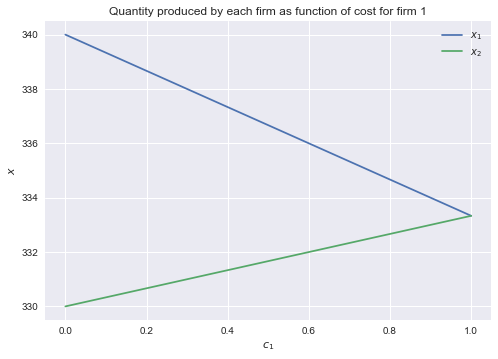

In [852]:
range_c = np.linspace(1,0,20)
range_x = [optimize.fsolve(vec_reaction, x0, args = ([0.1,101, c, 1])) for c in range_c]

plt.style.use('seaborn')
plt.clf()
plt.plot(range_c,array(range_x)[:,0], label = '$x_1$')
plt.plot(range_c,array(range_x)[:,1], label = '$x_2$')
plt.xlabel('$c_1$')
plt.ylabel('$x$')
plt.title('Quantity produced by each firm as function of cost for firm 1')
plt.legend()
plt.show ()

In the figure, we see, that as the cost of firm 1 goes up, the quantity produced by firm 1 falls, while the quantity produced by firm 2 goes up.

**Compare all three cases**

We have now tried to solve a situation with two firms competing with three different models, giving them the same parameter values. This leads to the following results:

In [868]:
fancy(f'For Bertrand: The equilibrium price is $p$ = {price1:.0f}, the equilibrium quantity is $q$ = {quantity1:.0f} and the profits for both firms are $π$ = {profit1:.0f}') 
fancy(f'For Stackelberg: the equilibrium price is $p$ = {p:.0f}, and the profits for both firms are $π_1$ = {profit_1:.0f} and $π_2$ = {profit_2:.0f}')
fancy(f'For Cournot: the equilibrium equilibrium quantity for both firms are $x^* =[x_1^*,x_2^*]$ = [{EQ[0]:.0f},{EQ[1]:.0f}] where the equilibrium price for both firms are $p^*$ = {price(EQ[0],EQ[1],101,0.1):.0f} with a profit of $\pi$= {profit(EQ[0],EQ[1],1,101,0.1):.0f}')


For Bertrand: The equilibrium price is $p$ = 54, the equilibrium quantity is $q$ = 53 and the profits for both firms are $π$ = 2776

For Stackelberg: the equilibrium price is $p$ = 26, and the profits for both firms are $π_1$ = 12500 and $π_2$ = 6250

For Cournot: the equilibrium equilibrium quantity for both firms are $x^* =[x_1^*,x_2^*]$ = [333,333] where the equilibrium price for both firms are $p^*$ = 34 with a profit of $\pi$= 11111

**Cournot with N > 2 firms**

In order to do an extention to one of the models, we now want to investigate the case of N > 2 firms. First we set up the situation theoretically and use Python to show this. Afterwards we will use Python to solve the model. 
In the following theoretical set-up we will follow the set-up in this note, adapting it to our situation: http://people.exeter.ac.uk/dgbalken/micro07/CournotHandout.pdf 

Following the notation from ealier we now add: 

- Firm $i$'s output: $x_i$

- Total output in in industry: $X=x_1+x_2+...+x_n$

- The opponent's output: $x_{-i} = X-x_i$



Each firm will then max profit given the expectation of $x_{-i}$: 

$$\Pi_i(x_{-i},x_i)=(p(x_{-i}+x_i)-c_i)x_i$$

as with the n = 2 case we use the invese demand funcktion in a linear case:

$$p = a-b(x_{-i}+x_i)=a-bX$$ 

The FOC of is then:
$$\frac{\partial \Pi_i}{\partial x_i} = \frac{\partial p}{\partial x_i} \cdot x_i + p-c_i = 0$$


where $\frac{\partial p}{\partial x_i} = -b$ giving us

$$\frac{\partial\Pi_i}{\partial x_i} : -bx_i + p-c_i = 0$$

inserting the inverse demand function:

$$\frac{\partial\Pi_i}{\partial x_i} : -bx_i + (a-b(x_{-i}+x_{i}))-c_i = 0$$

solving for $x_i$ to get the reaction function for firm $i$ given its expectation for the amount the rest of the firms produce:

$$x_i(x_{-i}) = \frac{a-c}{2b}-\frac{1}{2}x_{-i}$$

which is the case for all firms $i=1,..,n$. We have $X=x_i+x_{-i}$ so the FOC found earlier can be rewritten to:
$$ -bx_i + (a-bX-c_i) = 0$$

which for the n firms:
$$-bX + n(a-bX)-n\bar c = 0$$

where we use the average cost level: $\bar c = \frac{c_1+c_2+...+c_n}{n}$

we can now rewrite this and get the quantity produced and the price in the market: 

$$bX + n(bX) = n(A-\bar c)$$

$$(n+1)bX  = n(A-\bar c)$$

Quantity is then:

$$X = \frac{n}{n+1} \frac{a-\bar c}{b}$$

Price is:
$$p = a-bX = a-b[\frac{n}{n+1} \frac{a-\bar c}{b}] = \frac{1}{n+1}a + \frac{n}{n+1}\bar c$$


Using the found functions we can now try to set a program that is able to solve cases with N firms. 


In [794]:
def Round(a): 
    """A function that prints floats rounded as strings
    args:
    a : a float
    
    returns a string
    """
    return str("{:.2f}".format(a))

First we define a function, that calculates the prices $p = \frac{1}{n+1}a + \frac{n}{n+1}\bar c $ rewriting using the definition of the average cost level gives: $p= \frac{1}{n+1}a + \frac{c_1+c_2+...+c_n}{n+1}$ which we use in our function.

In [795]:
def price_eq(a, n, c):  
    """A function that computes price 
    args:
    a : total demand 
    n : number of firms 
    c : cost of firm i 
    
    returns a float
    """
        
    price = max((a+sum(c))/(1+n), 0)
    return price

We now want to define a function that returns the quantity produced for firm $i$.
this is given by:
$$x_i = \frac{a-bX-c_i}{b}=\frac{a-c_i}{b}-\frac{n}{n+1}\frac{a-\bar c}{b} = \frac{1}{n+1}\frac{a}{b}+ \frac{n(\bar c -c_i)-c_i}{(n+1)b} = \frac{1}{n+1}\frac{1}{b}[a- n(\bar c -c_i)-c_i]$$

use that $\bar c = \frac{c_1+c_2+...+c_n}{n}$
$$x_i = \frac{1}{n+1}\frac{1}{b}[a+ (n-1)c_i-(c_1+c_2+...+c_n-c_i)]$$
which we now use to define a function, that returns the quantity: 

In [796]:
def xi_eq(a, b, n, c, i): #Returns equilibrium quantity for firm i
    """A function that computes quantity for firm i
    args:
    a : total demand 
    b : elasticity of substitution between the good
    n : number of firms 
    c : cost of firm i 
    i : the number of the firm
    
    Returns a float"""
    
    x_i = (1/b)*((a+(n-1)*c[i]-sum(c))/(1+n))  
    return x_i

We can then define a function, that returns the quantity for the entire number of firms 

In [797]:
def X_eq(a, b, n, c): 
    """A function that computes quantity for the total amount of firms 
    args:
    a : total demand 
    b : elasticity of substitution between the good
    n : number of firms 
    c : cost of firm i 
    
    returns a float
    """
    
    X = []
    for i in range(0, n, 1):
        X.append(xi_eq(a, b, n, c, i))
        
    return sum(X)

Based on the assumtion that $$c_i = \bar c = c $$ the profit for firm $i$ can be found by:
$$\Pi_{i}=(p-c)x_{i}=\left(\frac{a+nc}{n+1}-c\right)\frac{1}{n+1}\frac{1}{b}(a-c)$$

Without identical marginal costs $$c_i \neq c $$ $$\bar c \neq c$$ the profit for firm $i$ would be: 
$$\Pi_{i}=(p-c_i)x_{i}=\left(\frac{a+n\bar c}{n+1}-c_i\right)\frac{1}{n+1}\frac{1}{b}(a+n(\bar c - c_i)-c_1) = \frac{1}{(n+1)^2 * b}(a+n(\bar c - c_1)-c_i)^2$$

By maximizing the previously derived profit function we find the equilibrium profit.

In [798]:
def profit_eq(a, b, n, c, i): 
    """A function that computes profit for firm i and sets profit to zero, if there is no production
    args:
    a : total demand 
    b : elasticity of substitution between the good
    n : number of firms 
    c : cost of firm i 
    i : the number of the firm
    
    returns a float
    """
    
    if xi_eq(a, b, n, c, i) == 0: 
        profit = 0
    else:
        profit = max((1/b)*(((a-n*c[i]+(sum(c)-c[i]))/(1+n))**2), 0)
        
    return profit


We are now ready to define a function, that can solve a general case of cournot competetion with n firms. We choose the the cost for each firm will be drawn from a uniform destribution using random.uniform, given it a seed number such that we can compare with the solution we later solve with Python. Note that adding a seed number means, that every firms will get the same random drawn cost values. This is done in order to compare with the solution later solved with Python. 

In [799]:
def EQ_N(a, b, n, c_low, c_high,seed): 
    """A function that draws number of firms and compute quantaties, price and average profit
    args:
    a : total demand 
    b : elasticity of substitution between the good
    N : the maximal number of firms that can be drawn 
    c_low : the lower bound of the interval for the cost 
    c_high : the upper bound of the interval for the cost 
    
    Returns a float"""
 
    
    #drawing of costs for each firm:
    c = []
    np.random.seed(seed)
    c = np.random.uniform(c_low,c_high,size=n)
    #the price: 
    price = price_eq(a, n, c) 
    
    #quantities and profits
    xi_list = []
    profiti_list = []
   
   
    
    #the quantity for the entire number of firms
    X = X_eq(a, b, n, c)

    
    return X, price, c    
   

    

First we solve with 1000 firms and use the same parameters as with the other three models:

In [800]:
a = 101
b = 0.1
c_low = 1
c_high = 5
seed = 1986
X,price, c_vec = EQ_N(a,b,1000,c_low,c_high,seed)
print('\n The number of firms are 1000 ' + 
                  '\n The total amount produced is ' + Round(X) +',' + ' while the price is ' + Round(price) + 
                   '\n')



 The number of firms are 1000 
 The total amount produced is 978.80, while the price is 3.12



**Quantity and pice as functions of n**

We now want to show how the amout produced depends on the number of firms n. We therefor create a list with a range for n:

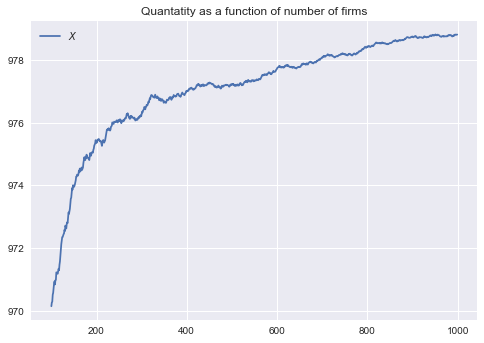

In [801]:
#list with n values 
n_vec = list(range(100,1000))

#array with solutions for different n 
output_vec1 = array([EQ_N(a,b,n,c_low,c_high,seed) for n in n_vec])



#plot the the  quantity as function of number of firms 
fig,ax = plt.subplots()
ax.plot(n_vec,output_vec1[:,0], label = '$X$')
ax.title.set_text('Quantatity as a function of number of firms') 
plt.legend()
plt.show()



Furthermore we can show how the price varies with number of firms n:

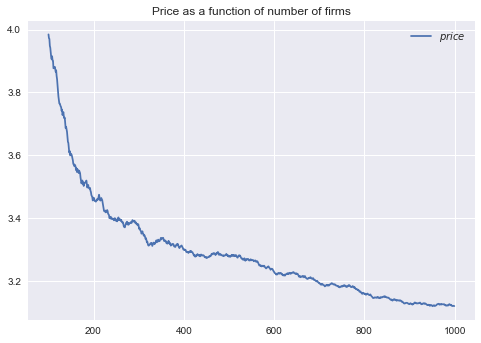

In [802]:
#define solution in order to show price for different n 
def solution(a,b,c_vec):
    n= len(c_vec) #the number of firms will be equal to the length of the c vector 
    q = n/(n+1) * (a-np.mean(c_vec))/b
    p = a-b*q
    return q,p

output_vec = array([solution(a,b,c_vec) for c_vec in output_vec1[:,2]])

#plot the price as function of number of firms
plt.style.use('seaborn')
plt.clf()
plt.plot(n_vec,output_vec[:,1], label = '$price$')
plt.title('Price as a function of number of firms') 
plt.legend()
plt.show()

**Solving with python**\
Up untill now we have solved the model analytically and then used python to show the results. However the model can also be solved using python, which will be done in the following section:

First we set up the same number og firms and parameters values as in the previous solution:

In [803]:
N = 1000 # number of firms 
#np.random.seed(1986)
c_low = 1
c_high = 5
c_vec = np.random.uniform(c_low,c_high,size=N)

We then use the profit function: $\Pi_i = (p(x_{-i}+x_{i})-c_i)x_i$ with $p=a-b(x_{-i}+x_i)$ to find the foc with sympy:

In [804]:
c_i = sm.symbols('c_i') 
x_i = sm.symbols('x_i') # x for firm i
x_minus = sm.symbols('x_{-i}') # x for the the opponents

#The profit of firm 1 is then: 
Pi_i = x_i*((a_1-b_1*(x_i+x_minus))-c_i)

#giving focs:
foc = sm.diff(Pi_i,x_i)
foc


a - b*x_i - b*(x_i + x_{-i}) - c_i

In order to use this in our solutionen, we rewrite $x_{i}+x_{-i} = \sum x_{i}$ using np.sum and then define a function for the foc:

In [805]:
def focs(a,b,x_vec,c_vec):
    """A function that defines the foc for firm i
     args:
      a : total demand 
      b : elasticity of substitution between the good
      c_vec : a vector with the cost for the firms 
      x_vec : the quantatiy of firm i 
     """
    # use the foc from the sympy.diff 
    return -b*x_vec+a-b*np.sum(x_vec)-c_vec 

We are now ready to set up a function that solves the case with N firms:

In [810]:
def solve(a,b,c_vec):
    """A function that solve the cournot model with N firms
     args:
    a : total demand 
    b : elasticity of substitution between the good
    c_vec : a vector with the cost for the firms  
    
    Returns two floats
    """
    obj = lambda x_vec : focs(a,b,x_vec,c_vec)

    res = optimize.root(obj, x0 = [90 for n in range(N)])
     
    x_vec_star = res.x
    Q = np.sum(x_vec_star)
    
    # Use inverse demand to find price 
    p = a- b*Q
    return Q, p

We then use the profit function: $\Pi_i = (p(x_{-i}+x_{i})-c_i)x_i$ with $p=a-b(x_{-i}+x_i)$ to find the foc with sympy:

In [811]:
#Choose the same parameters as in previous models 
a = 101
b = 0.1
X,p = solve(a,b,c_vec)
print('\n The number of firms are 1000 ' + 
                  '\n The total amount produced is ' + Round(Q) +',' + ' while the price is ' + Round(p) + 
                   '\n')


 The number of firms are 1000 
 The total amount produced is 978.80, while the price is 3.12



In [808]:
#Compare with the solution from the analytical solution
X,price, c_vec = EQ_N(a,b,1000,c_low,c_high,1986)
print('\n The number of firms are 1000 ' + 
                  '\n The total amount produced is ' + Round(X) +',' + ' while the price is ' + Round(price) + 
                   '\n')


 The number of firms are 1000 
 The total amount produced is 978.80, while the price is 3.12



We see, that we get the same result for both the analytical solution and the solution using Python to solve.

In [809]:
#my try with the figure 
#list with n values 
#n_vec = list(range(100,1000))

#array with solutions for different n 
#output_vec1 = array([solve(a,b,c_vec) for N in n_vec])

#plot the the  quantity as function of number of firms 
#fig,ax = plt.subplots()
#ax.plot(n_vec,output_vec1[:,0], label = '$X$')
#ax.title.set_text('Quantatity as a function of number of firms') 
#plt.legend()
#plt.show()




**Conclusion**

In this paper we examine two firms who have the possibility of competing in Bertrand, Stackelberg and Cournot. We use the same parameter values for all competition types, and find that the firms benefit the most from competing in a Cournot setting as this yields the highest total profits of XX. This is intuitive, as in contrast to Bertrand, the firms will undercut each other until their price is equal to their marginal costs to obtain efficiency. Therefore, this setting yields a price as in perfect competition, whereas Cournot yields an oligopoly equilibrium. 

As Cournot yields the best outcome in terms of profits for two firms, we extend this setting for $n$ firms. We find that for $n\rightarrow\infty$, the totalt amount produces increases, while the price falls because competing becomes more intense as the competition setting moves from oligopoly to infinitely many firms competing in quantities.